1.	Introduction

Enron Corporation, an American energy, commodities and services company, was founded in 1985 and used to be one of the world’s major electricity and natural gas companies with claimed revenues of nearly $101 billion during 2000. Fortune nominated Enron as “American Most Innovative Company” for six consecutive years. (“Enron”, 2017) There is no denying that Enron Corp. reached dramatics heights and with its roots in the universal utility services, the company built a solid reputation for old-economy stability. Lead by one of the smartest business man, Jeffery Skilling(CEO), Enron finally became the largest dominant force in the energy and natural gas sectors with an extensive pipeline network in North America. Undoubtedly, by far, Enron’s story was perfect and splendid. However, not all great stories come with happy endings. Enron eventually faced a dizzying collapse and by the fall of 2000, the company was starting to crumble under its own weight. Actually Enron collapsed so fast that it only took several weeks for this seventh largest company in America to claim a bankruptcy at the end of 2001. 

Enron was revealed that its published financial condition was inflated by institutionalized accounting fraud and its income as well as equity value were both overstated by a couple of billion dollars. As revealed by the investigator, the company had made a dozen partner companies and used those companies to hide its financial losses and debts on its trading business. (“The fall of enron”, 2017) The impact of this company bankruptcy was extensive and unprecedented. It wiped out the remaining holdings of thousands of investors and throwed 21,000 people out of work. At the same time, Arthur Andersen, one of the “Big Five” accounting firms in the world, was convicted of complicating in perpetrating one of the biggest frauds in corporate history and later surrendered its CPA licenses on 2002. Not only does this swift collapse have a huge impact on business, but it also had implications for politics. Two federal agencies and more than ten congressional committees were investigated and found guilty of criminal charges. What was going wrong on Enron’s business and how could we prevent it in the future? These two major questions soon became increasingly important to the public. 

This report is intended to provide some in-depth insights into the Enron Fraud Scandal and try to resolve the reason of Enron’s collapse as well as provide some necessary recommendations to prevent the occurrence of similar business failures in the future. The analysis is based on Enron’s public employees’ information and the collection of recent email contents, which are both datasets. It is for reader who has a basic understanding of Python programming language and machine learning algorithms and it includes some necessary data analysis and statistical techniques. The report begins by preparing and re-designing data into specific format for further analysis. It then continues by providing some basic information about the data and raising some key observations. Some specific data points are later checked and some errors (empty entries) in the data are fixed. Lastly, the report involves a reformat of data into Numpy arrays and a realizations of linear regression algorithm to conclude the experiment.


In [1]:
""" 
    Starter code for exploring the Enron dataset (emails + finances);
    loads up the dataset (pickled dict of dicts).

    The dataset has the form:
    enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"] = { features_dict }

    {features_dict} is a dictionary of features associated with that person.
    You should explore features_dict as part of the mini-project,
    but here's an example to get you started:

    enron_data["SKILLING JEFFREY K"]["bonus"] = 5600000
    
"""

import pickle

# pickle can save the file as an object while read only deals with strings.
#  use pickle.dump to save and use pickle.load to read. if you save the file 
#  as a dictionary using pickle, later if you read the file, you'll still
#  get a dictionary.

path = "/Users/philo/Desktop/Machine Learning/ud120-projects-master/final_project/final_project_dataset.pkl" 
enron_data = pickle.load(open(path, "r"))

print "there are " + str(len(enron_data)) + " people in total"

print "numbers of features are " + str(len(enron_data.items()[0][1]))

#random.choice gives a random pair. you may use key,v = random.choice(...)
#import random
#print random.choice(list(enron_data.items()))

#now im interesting in the num of pois (data[person_name]["poi"] == 1)
print "numofpois " + str(len(filter(lambda x: x[1]["poi"] == 1, enron_data.items())))

there are 146 people in total
numbers of features are 21
numofpois 18


__Check how many poi names in poi_name.txt are in enron_data?__

note enron_data is a dataset including all pois

In [2]:
poi_path = "/Users/philo/Desktop/Machine Learning/ud120-projects-master/final_project/poi_names.txt"     

total = 0

with open(poi_path) as file_name:
    names = file_name.read()
    split_names = names.split('\n')
    split_names.pop(0)
    split_names.pop(0)
    split_names.pop(-1)
    print "there are " + str(len(split_names)) + " pois in poi_name file"
    for name in split_names:
        get_name = name.split(') ')
        pure_name = get_name[1]
        sep_name = pure_name.split(',')
        connect_name = sep_name[0] + sep_name[1]
        for item in enron_data.keys():
            if item.find(connect_name.upper()) != -1:
                if enron_data[item]['poi'] == 1:
                    total += 1


print "num of poi name in enron dataset is " + str(total)

there are 35 pois in poi_name file
num of poi name in enron dataset is 15


__Clearly there are some pois missing from dataset, what could be a reason?__


------

__ Note that there is a big problem here__

__our main thought is about having enough data to really learn the patterns.  In general, more data is always better--only having 18 data points doesn't give you that many examples to learn from.__

__Thus we will try to investigate that if there can be some crucial information for us to continue our analysis__

---

### We will try to investigate some specific point of data

* __What is the total value of the stock belonging to James Prentice?__

In [3]:
name1 = 'prentice james'.upper()

for item in enron_data.keys():
    if item.find(name1) != -1:
        print enron_data[item]['total_stock_value']

1095040


* __How many messages do we have from Wesley Colwell to POIs?__

In [4]:
name2 = 'colwell wesley'.upper()

for item in enron_data.keys():
    if item.find(name2) != -1:
        print enron_data[item]['from_this_person_to_poi']

11


* __What is the value of stock options excercised by Jeff Skilling?__


In [5]:
name3 = 'skilling jeff'.upper()
max_payment = 0
max_payment_name = ''
for item in enron_data.keys():
    if item.find(name3) != -1:
        max_payment = enron_data[item]['total_payments']
        max_payment_name = name3
        print enron_data[item]['exercised_stock_options']

19250000


* __Of Lay, Skilling and Fastow, who took home the most money, how much money was that? (compare total payment)__

In [6]:
max_payment = 0
name4 = 'Lay'.upper()
name5 = 'Fastow'.upper()


for item in enron_data.keys():
    if item.find(name4) != -1:
        if enron_data[item]['total_payments'] > max_payment:
            max_payment = enron_data[item]['total_payments']
            max_payment_name = name4
    if item.find(name5) != -1:
        if enron_data[item]['total_payments'] > max_payment:
            max_payment = enron_data[item]['total_payments']
            max_payment_name = name5
            
print max_payment_name + ' took the most money, which is',
print str(max_payment)

LAY took the most money, which is 103559793


* __What percentage of people in the dataset have 'NaN' for their total payments?__

In [7]:
count = 0
for item in enron_data.values():
    if item['total_payments'] == 'NaN':
        count += 1
print count
print float(count)/len(enron_data.keys())

21
0.143835616438


* __What percentage of POIs in the dataset have 'NaN' for their total payments?__

In [8]:
count = 0
for item in enron_data.values():
    if item['total_payments'] == 'NaN' and item['poi'] == '1' :
        count += 1
print float(count)/len(enron_data.keys())

0.0


---

# Important conclusion:

Hence, if a machine learning algorithm were to use total_payment as a feature, i would expect it to associate a 'NaN' value with non-pois.

Next, i would like to add 10 new data, which are all pois. Also i set those 10 pois with 'NaN' as their salaries. Consider the impact.

    * Now there are 156 folks in dataset, 31 of whom have "NaN" total_payments. This makes for 20% of them with a "NaN" overall.

    * Now there are 28 POI's, 10 of whom have "NaN" for total_payment.

__That's 36% of the POI's who have "NaN" for total_payments, a big jump from before(which is 0%).__
## Once the new data points are added, __I believe that a supervised classification algorithm might interpret 'NaN' for total_payments as a clue that someone is a POI__



---

### Since not all features have values and some of them are filled with 'NaN', the next step for us is to deal with those unfilled values

__ First let's calculate how many employees have quantified salaries and valid email addresses__

In [9]:
#first count quantified salaries
count_salary = 0
def if_quantified(los):
    if los['salary'] != 'NaN':
        return True

print str(len(filter(if_quantified, enron_data.values()))) + ' people have quantified salaries in the dataset'

95 people have quantified salaries in the dataset


In [10]:
#next, count valid emails
def if_valid_emails(los):
    if los['email_address'] != 'NaN':
        return True
    
print str(len(filter(if_valid_emails, enron_data.values()))) + ' people have valid email addresses in the dataset'

111 people have valid email addresses in the dataset


----

### Next, we will convert enron_data which is a dictionary into numpy array

for unfilled values, we replace them with 0

In [11]:
""" 
    A general tool for converting data from the
    dictionary format to an (n x k) python list that's 
    ready for training an sklearn algorithm

    n--no. of key-value pairs in dictonary
    k--no. of features being extracted

    dictionary keys are names of persons in dataset
    dictionary values are dictionaries, where each
        key-value pair in the dict is the name
        of a feature, and its value for that person

    In addition to converting a dictionary to a numpy 
    array, you may want to separate the labels from the
    features--this is what targetFeatureSplit is for

    so, if you want to have the poi label as the target,
    and the features you want to use are the person's
    salary and bonus, here's what you would do:

    feature_list = ["poi", "salary", "bonus"] 
    data_array = featureFormat( data_dictionary, feature_list )
    label, features = targetFeatureSplit(data_array)

    the line above (targetFeatureSplit) assumes that the
    label is the _first_ item in feature_list--very important
    that poi is listed first!
"""


import numpy as np

def featureFormat(dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print "error: key ", feature, " not present"
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )
        # Logic for deciding whether or not to add the data point.

        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            #note tmp_list[0] is either 0 or 1
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )
        
    return np.array(return_list)


def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features 


此例中加入了新的 POI，而我们没有任何人的财务信息，这就带来了一个微妙的问题，即算法可能会注意到我们缺少他们的财务信息，并将这一点作为他们是 POI 的线索。换个角度来看，为我们的两个类生成数据的方式现在有所不同 - 非 POI 的人全都来自财务电子表格，之后手动加入了许多 POI。这种不同可能会诱使我们以为我们的表现优于实际状况 - 假设你使用 POI 检测器来确定某个未见过的新人是否是 POI，而且该人不在电子表格上。然后，他们的所有财务数据都将包含“NaN”，但该人极有可能不是 POI（世界上非 POI 的人比 POI 多得多，即使在安然也是如此）- 然而你可能会无意中将他们标识为 POI！

这就是说，在生成或增大数据集时，如果数据来自不同类的不同来源，你应格外小心。它很容易会造成我们在此展示的偏差或错误类型。可通过多种方法处理此问题。举例而言，如果仅使用了电子邮件数据，则你无需担心此问题（在这种情况下，财务数据中的差异并不重要，因为并未使用财务特征）。还可以通过更复杂的方法来估计这些偏差可能会对你的最终答案造成多大影响，不过此话题超出了本课程的范围。

目前的结论就是，要非常小心地对待引入来自不同来源（具体取决于类）的特征这个问题！引入此类特征常常会意外地带来偏差和错误

# Now we apply linear regression algorithm in Machine Learning to predict which factor has a strong relationship with bonus.

__First, let us try to figure out the relationship between bonus and salary__

<IPython.core.display.Javascript object>


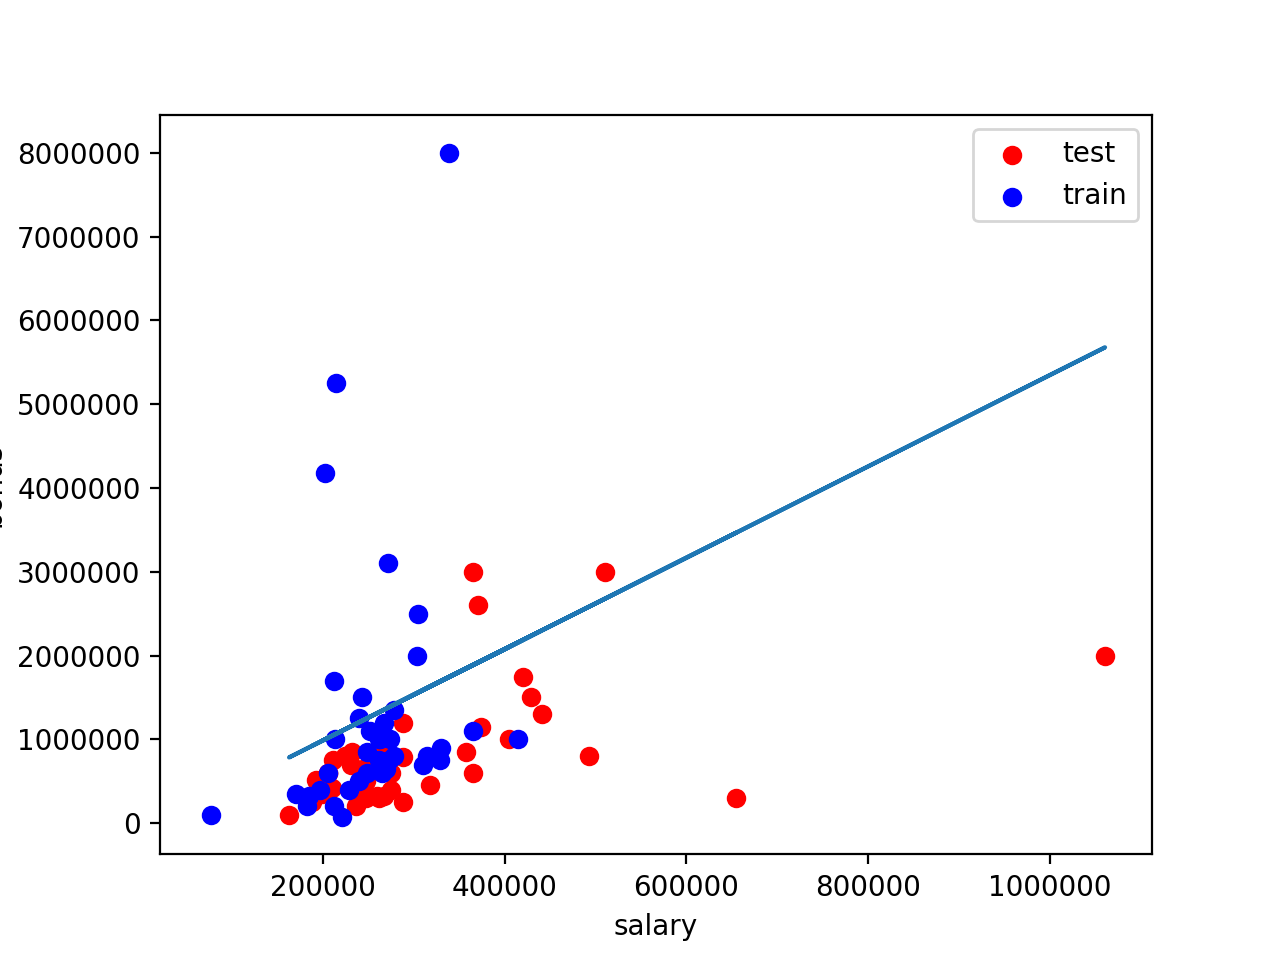

In [14]:
from sklearn import linear_model
dictionary = pickle.load( open("/Users/philo/Desktop/Machine Learning/ud120-projects-master/final_project/final_project_dataset_modified.pkl", "r") )
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )
### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

reg2 = linear_model.LinearRegression()
reg2.fit(feature_train, target_train)   

### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
%matplotlib notebook

for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg2.predict(feature_test) )
except NameError:
    pass

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [17]:
slope = reg2.coef_[0]
intercept = reg2.intercept_
print slope
print intercept

training_score = reg2.score(feature_train, target_train)
print training_score

testing_score = reg2.score(feature_test, target_test)
print testing_score

5.44814028881
-102360.543294
0.0455091926995
-1.48499241737


__Observation:
Note that our testing_score is negative, a pretty bad score. And also visually, we find that salary does not seem to have a big influence on bonus__

__Thus, next let's try long_term_incentive.__

<IPython.core.display.Javascript object>


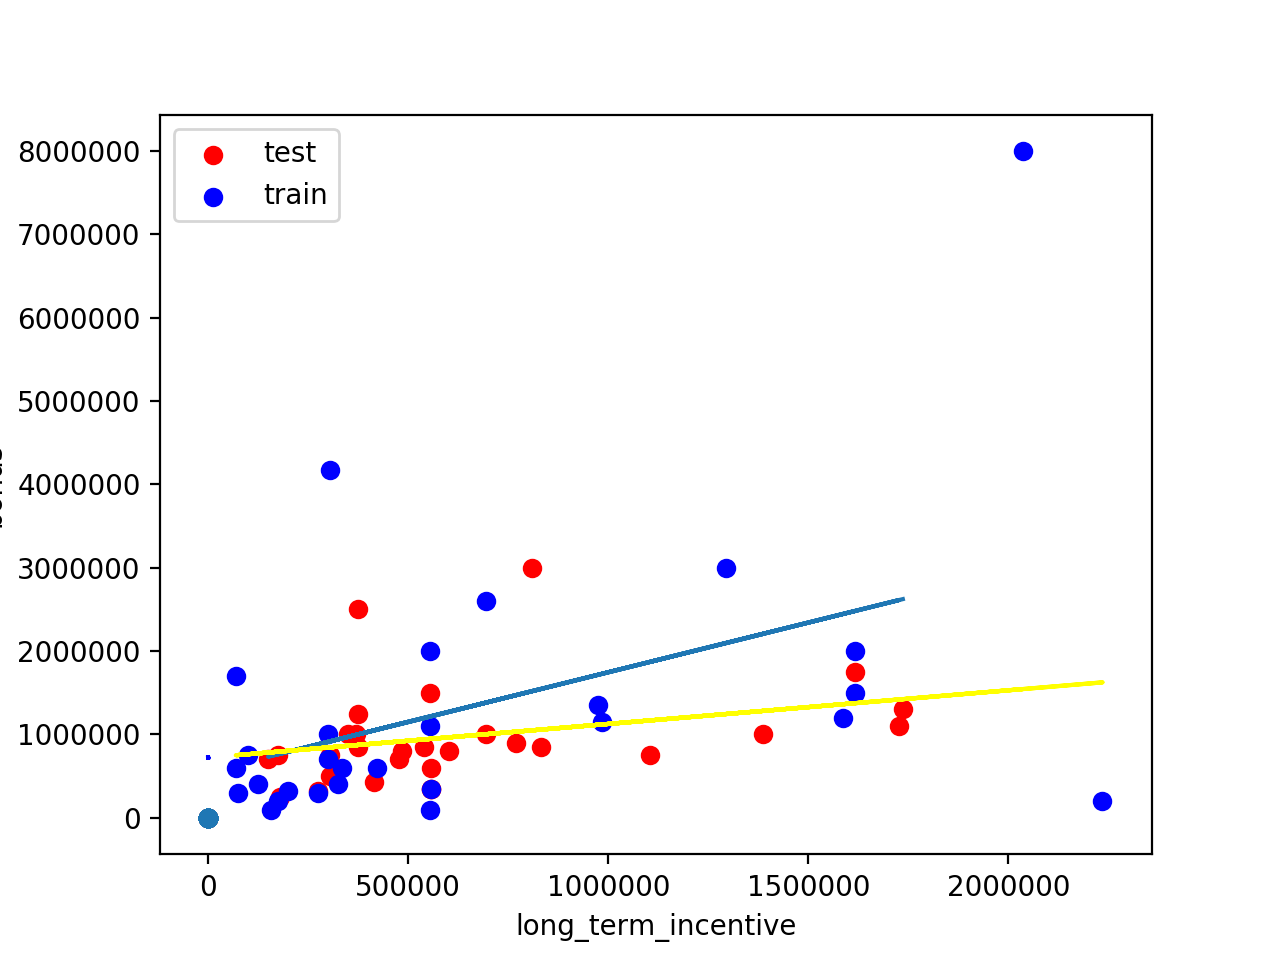

slope 0.403640645289
intercept 723040.817416
training_score 0.0741662130399
testing_score 0.0939176474328


In [25]:
'''
    Note that this cell is simply a copy of the previous cell 
    but with a change from salary to long_term_incentive
'''

from sklearn import linear_model
dictionary = pickle.load( open("/Users/philo/Desktop/Machine Learning/ud120-projects-master/final_project/final_project_dataset_modified.pkl", "r") )

features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"


reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)   

### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
%matplotlib notebook


for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass


reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="yellow")


plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

slope = reg.coef_[0]
intercept = reg.intercept_
print "slope " + str(slope)
print "intercept " + str(intercept)

training_score = reg.score(feature_train, target_train)
print "training_score " + str(training_score)

testing_score = reg.score(feature_test, target_test)
print "testing_score " + str(testing_score)


__Observation: This implies that long_term_incentive is a better feature for predicting someone's bonus.__

__Also, we have notice that there are significantly outliers that impact our prediction. Those outliers are falling into our testing data. Now I did another regression and plot the yellow line. And now the outliers are falling into training set.(no outliers impact). By comparing the two lines, we notifty a big difference.__

__Hence, the next step for us is to deal with those outliers.__

# Remove outliers

__We will try two things at this part:__
* First I will simply remove all possible outliers and see the pattern(all points with large residual values)
* Next, I will look into the outliers and analyze them to decide whether to remove it or not

General method dealing with outliers:
1. train with outliers and get a regression line
2. remove outliers by checking the residual value from each point to that regression line. We usually take 10% of data with largest residual values out
   
3. train again(without outliers)


In [29]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle
import sys
path = "/Users/philo/Desktop/Machine Learning/ud120-projects-master/outliers/"
sys.path.append(path)
from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("/Users/philo/Desktop/Machine Learning/ud120-projects-master/outliers/practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("/Users/philo/Desktop/Machine Learning/ud120-projects-master/outliers/practice_outliers_net_worths.pkl", "r") )

### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"


### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

outlierCleaner() is returning an empty list, no refitting to be done
